In [1]:
import pandas as pd
import warnings 
import numpy as np
import talib
import talib.abstract as abstract

warnings.filterwarnings('ignore')

df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2022-06-20,500.0,502.0,495.0,498.0,18267359790
2022-06-21,501.0,505.0,499.0,505.0,17298234720
2022-06-22,501.0,503.0,494.5,494.5,16630857096


In [3]:
abstract.RSI(df)

date
2007-01-02          NaN
2007-01-03          NaN
2007-01-04          NaN
2007-01-05          NaN
2007-01-08          NaN
                ...    
2022-06-20    34.570299
2022-06-21    39.168398
2022-06-22    35.175241
2022-06-23    32.149748
2022-06-24    32.840951
Length: 3813, dtype: float64

7 14 20 60 167.39999999999998
7 14 20 62 198.89999999999998
7 14 20 64 279.4
7 14 20 66 297.4
7 14 20 68 318.79999999999995
7 14 20 78 424.79999999999995
7 14 26 64 481.0
7 18 26 64 503.4
7 18 26 66 504.20000000000005
7 18 26 68 509.70000000000005
7 38 20 70 510.79999999999995
7 42 20 64 518.8
7 62 20 62 528.8
11 50 20 62 584.35
11 50 22 62 590.5
19 30 26 66 594.85
19 30 28 66 595.0
19 50 26 64 622.85
19 50 28 64 623.0
19 74 26 60 640.85
19 74 28 60 645.5
27 46 30 62 660.85


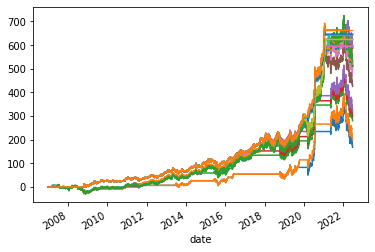

In [7]:
highest_earning = 0

for shortPeriod in range(7,80,4):
    for longPeriod in range(14,80,4):
        if longPeriod>shortPeriod:
            rsi_short = abstract.RSI(df,timeperiod=shortPeriod)
            rsi_long = abstract.RSI(df,timeperiod=longPeriod)

            df['rsi_short'] = rsi_short
            df['rsi_long'] = rsi_long
            
            for lowRSI in range(20,40,2):
                for highRSI in range(60,85,2):

                    df['hold'] = np.nan
                    df.loc[df['rsi_short']<lowRSI,'hold'] = 1
                    df.loc[(df['rsi_short']<df['rsi_long']) & (df['rsi_short'].shift(1)>df['rsi_long'].shift(1)) & (df['rsi_short']>highRSI),'hold'] = 0 

                    df['hold'].ffill(inplace=True)
                    df['hold'] = df['hold'].fillna(0)

                    df['earn'] = 0

                    df['earn'].loc[df['hold']==1] = df['open'].shift(-2)-df['open'].shift(-1)

                    
                    
                    if df['earn'].cumsum().dropna().iloc[-1]>highest_earning:
                        print(shortPeriod,longPeriod,lowRSI,highRSI,df['earn'].cumsum().dropna().iloc[-1])
                        df['earn'].cumsum().plot()
                        highest_earning = df['earn'].cumsum().dropna().iloc[-1]
                        

79 78 38 84 660.85


Start date,2007-01-02
End date,2022-06-24
Total months,181
,Backtest
Annual return,22.634%
Cumulative returns,2091.63%
Annual volatility,22.719%
Sharpe ratio,1.01
Calmar ratio,0.86
Stability,0.95
Max drawdown,-26.465%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,26.46,2008-10-30,2008-11-19,2009-03-12,96
1,23.38,2015-03-19,2015-08-21,2016-02-26,247
2,21.08,2018-09-04,2019-01-02,2019-04-17,162
3,19.87,2011-06-07,2011-08-05,2012-01-17,161
4,19.83,2013-05-07,2013-08-19,2014-03-11,221


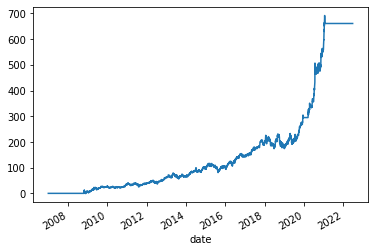

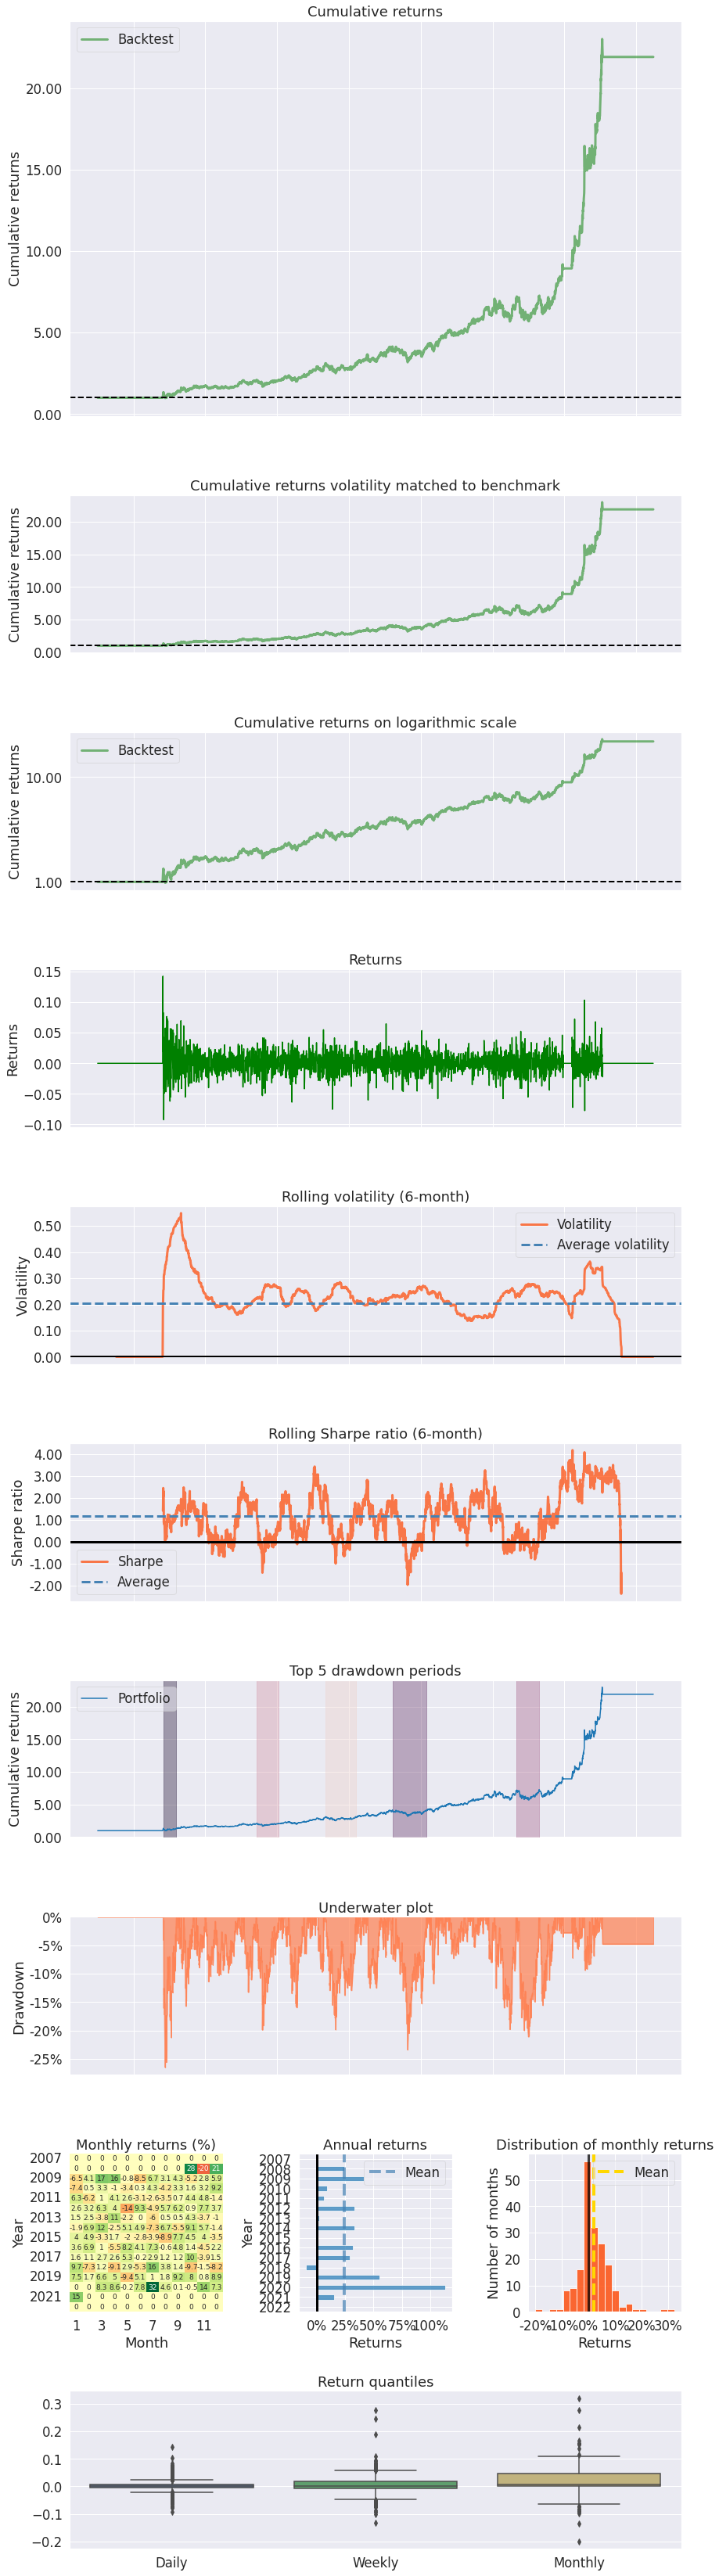

In [8]:
rsi_short = abstract.RSI(df,timeperiod=27)
rsi_long = abstract.RSI(df,timeperiod=46)

df['rsi_short'] = rsi_short
df['rsi_long'] = rsi_long


df['hold'] = np.nan
df.loc[df['rsi_short']<30,'hold'] = 1
df.loc[(df['rsi_short']<df['rsi_long']) & (df['rsi_short'].shift(1)>df['rsi_long'].shift(1)) & (df['rsi_short']>62),'hold'] = 0 

df['hold'].ffill(inplace=True)
df['hold'] = df['hold'].fillna(0)

df['earn'] = 0

df['earn'].loc[df['hold']==1] = df['open'].shift(-2)-df['open'].shift(-1)



print(shortPeriod,longPeriod,lowRSI,highRSI,df['earn'].cumsum().dropna().iloc[-1])
df['earn'].cumsum().plot()

import pyfolio as pf
pf.create_returns_tear_sheet(df['earn']/df['open'].shift(-1))


In [9]:
df.tail(10)

,open,high,low,close,volume,rsi_short,rsi_long,hold,earn
date,,,,,,,,,
2022-06-13,518.0,519.0,515.0,516.0,18998155460,42.683708,43.473137,0.0,0.0
2022-06-14,507.0,514.0,507.0,513.0,19813036892,42.095780,43.105908,0.0,0.0
2022-06-15,508.0,515.0,508.0,509.0,19580150319,41.307964,42.615266,0.0,0.0
2022-06-16,515.0,516.0,507.0,508.0,16331470764,41.108233,42.491666,0.0,0.0
2022-06-17,499.5,503.0,499.0,501.0,24260277915,39.712421,41.627736,0.0,0.0
2022-06-20,500.0,502.0,495.0,498.0,18267359790,39.121235,41.260221,0.0,0.0
2022-06-21,501.0,505.0,499.0,505.0,17298234720,41.240773,42.471645,0.0,0.0
2022-06-22,501.0,503.0,494.5,494.5,16630857096,39.119251,41.169742,0.0,0.0
2022-06-23,492.0,493.5,485.0,485.5,22836692325,37.406436,40.092916,0.0,0.0
